**Hello everyone!**  

**Welcome to Colab!**

This is a cloud-based development environment designed for machine learning students and professionals. With Google Colab, you can write and run code step-by-step in Python (and also experiment with R or Julia) directly in your browser, without needing any local setup.  

Colab provides free access to GPUs and TPUs (Tensor Processing Units), making it easier to train and test deep learning models at scale. It also integrates smoothly with Google Drive, so you can save, share, and collaborate on notebooks in real time.  

Whether you’re exploring data, building models, or prototyping research ideas, Colab is a flexible and accessible tool to get started quickly.

P.S. you can use it as a text editor too! It supports the markdown format

In [ ]:
!git clone https://github.com/G-Chist/google-colab-workshop.git

fatal: destination path 'google-colab-workshop' already exists and is not an empty directory.


## Let's start by importing some libraries first:

In [ ]:
import torch  # the main module for PyTorch. You need to import torch to use the core features
import torch.nn as nn  # neural network building blocks
import torch.optim as optim  # optimizers (training the neural network)
import matplotlib.pyplot as plt  # visualization
import numpy as np #does everything. Probability, linalg, randomization.
from tqdm import trange #progressbar :D

## Now, let's define the training data:

amount of samples in fake dataset: 100


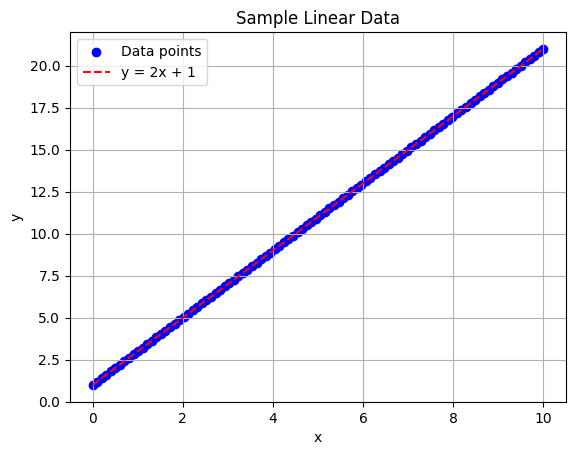

In [ ]:
np.random.seed(67) #lol
def create_sample_data(start_x: int = 0, end_x: int = 10, samples_to_make: int = 100, noise: bool = False, plot: bool = False) -> tuple [np.ndarray, np.ndarray]:
    x = np.linspace(start_x, end_x, samples_to_make)
    print(f"amount of samples in fake dataset: {x.shape[0]}")
    if noise:
        y = 2.0 * x +1.0 + np.random.normal(0, 1, x.shape)
    else:
        y = 2.0 * x +1.0
    if plot:
        plt.scatter(x, y, color='blue', label='Data points')
        plt.plot(x, 2*x + 1, color='red', linestyle='--', label='y = 2x + 1')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Sample Linear Data')
        plt.legend()
        plt.grid(True)
        plt.show()
    return x, y
x, y = create_sample_data(plot = True)

## Let's define a model we are training (linear regression => a single input and a single output, a linear correlation is assumed):

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_dimension=1, output_dimension=1):
        super().__init__()
        self.linear = nn.Linear(input_dimension, output_dimension)
    def forward(self, x):
        return self.linear(x)


model=SimpleNN()


## Let's also define the loss function and the optimizer:

In [ ]:
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Stochastic Gradient Descent

## And now we can finally train the model!

In [ ]:
def train_nn(model: nn.Module, x: np.ndarray, y:np.ndarray,  criterion: nn.Module, optimizer: optim.Optimizer, num_epochs: int = 1000 ):
    x = torch.tensor(x, dtype=torch.float32).view(-1, 1)
    y = torch.tensor(y, dtype=torch.float32).view(-1,1)
    # print(x.dtype)
    # print(y.dtype)
    for epoch in trange(num_epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()#zero out gradients to remove gradient accumulation from prior iters
        loss.backward() #cheatcode, look into autograd to see how this works
        optimizer.step()
        if (epoch+1) % 100 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
            # print(f"Predictions: {y_pred.detach().numpy().flatten()}")
    return model

## Let's see the parameters and make some predictions given this model now:

 50%|████▉     | 496/1000 [00:00<00:00, 2484.35it/s]

Epoch 100, Loss: 0.0214
Epoch 200, Loss: 0.0194
Epoch 300, Loss: 0.0176
Epoch 400, Loss: 0.0159
Epoch 500, Loss: 0.0144
Epoch 600, Loss: 0.0130


100%|██████████| 1000/1000 [00:00<00:00, 2539.65it/s]


Epoch 700, Loss: 0.0118
Epoch 800, Loss: 0.0107
Epoch 900, Loss: 0.0097
Epoch 1000, Loss: 0.0088
Predictions for x = 5.0 and 6.0: [[10.953918]
 [12.981838]]


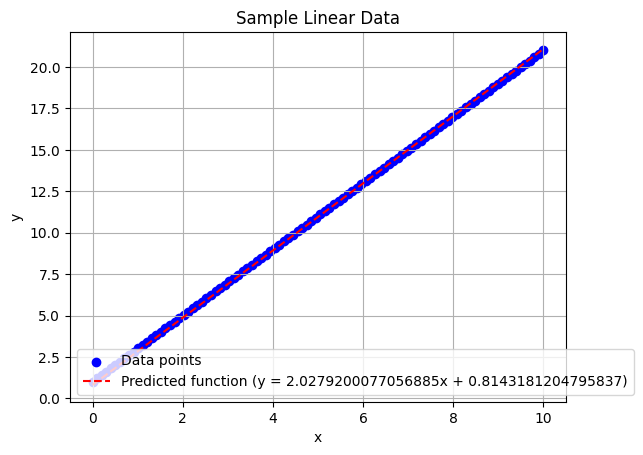

In [ ]:
# Learned parameters
best_mod = train_nn(model, x, y, criterion, optimizer)
# Make predictions on new data
x_test = torch.tensor([[5.0, 6.0]])
y_pred_test = model(torch.transpose(x_test, 0, -1))
print("Predictions for x = 5.0 and 6.0:", y_pred_test.detach().numpy())
[w, b] = best_mod.parameters()
# Plot predictions and real data
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, w.item()*x + b.item(), color='red', linestyle='--', label=f'Predicted function (y = {w.item()}x + {b.item()})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Linear Data')
plt.legend()
plt.grid(True)
plt.show()

## Let's see how a similar model performs given noisy data:

amount of samples in fake dataset: 100


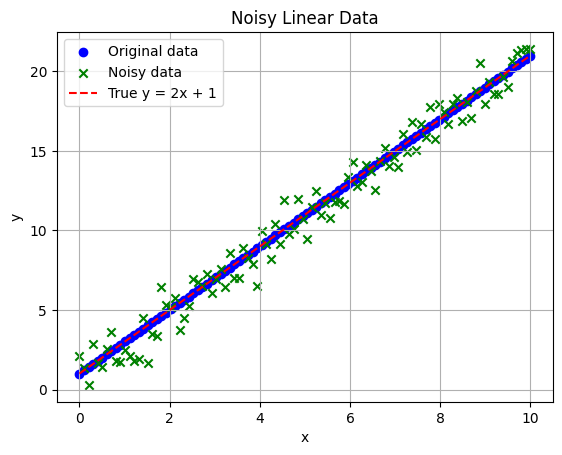

 52%|█████▏    | 516/1000 [00:00<00:00, 2575.89it/s]

Epoch 100, Loss: 0.8407
Epoch 200, Loss: 0.8366
Epoch 300, Loss: 0.8350
Epoch 400, Loss: 0.8345
Epoch 500, Loss: 0.8343
Epoch 600, Loss: 0.8342


100%|██████████| 1000/1000 [00:00<00:00, 2546.43it/s]


Epoch 700, Loss: 0.8342
Epoch 800, Loss: 0.8341
Epoch 900, Loss: 0.8341
Epoch 1000, Loss: 0.8341
Learned weight (noisy data): 2.0309, Learned bias: 0.6779


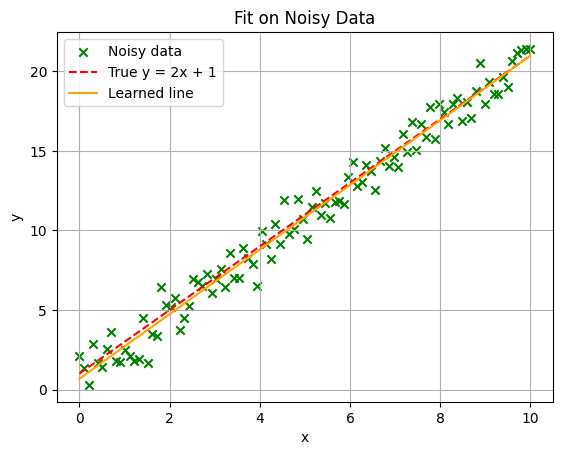

In [ ]:
# ---------------------------------
# Create noisy training data
# ---------------------------------

# Original clean data: y = 2x + 1
x_noisy, y_noisy = create_sample_data(noise=True)

# Convert to numpy for plotting
x_noisy_np = x_noisy.flatten()
y_noisy_np = y_noisy.flatten()

# Plot noisy data vs original
plt.scatter(x, y, color='blue', label='Original data')
plt.scatter(x_noisy_np, y_noisy_np, color='green', marker='x', label='Noisy data')
plt.plot(x, 2*x + 1, color='red', linestyle='--', label='True y = 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Linear Data')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------
# Retrain model on noisy data
# ---------------------------------
model_noisy = SimpleNN(1,1)
criterion = nn.MSELoss()
optimizer_noisy = optim.SGD(model_noisy.parameters(), lr=0.01)
best_noisy_mod = train_nn(model_noisy, x_noisy_np, y_noisy_np, criterion, optimizer=optimizer_noisy)

# ---------------------------------
# Visualize learned fit on noisy data
# ---------------------------------
[w_noisy, b_noisy] = model_noisy.parameters()
print(f"Learned weight (noisy data): {w_noisy.item():.4f}, Learned bias: {b_noisy.item():.4f}")

# Plot noisy points and learned line
plt.scatter(x_noisy_np, y_noisy_np, color='green', marker='x', label='Noisy data')
plt.plot(x, 2*x + 1, color='red', linestyle='--', label='True y = 2x + 1')
plt.plot(x_noisy_np, (w_noisy.item()*x_noisy_np + b_noisy.item()), color='orange', label='Learned line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fit on Noisy Data')
plt.legend()
plt.grid(True)
plt.show()

## But what if we want to use a large custom dataset instead of defining something by hand in a code block?

## Step 1: mount Google Drive to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 2: Extract the .tar file and list its contents
(assuming your dataset is at My Drive/Datasets/linreg.tar)

Colab runs on top of Ubuntu Linux under the hood, so you can use normal shell commands (!) in cells to manage files.

In [ ]:
# make sure target directory exists
!mkdir -p /content/linreg_data

# extract tar file into that folder
!tar -xf "/content/drive/My Drive/Datasets/linreg.tar" -C /content/linreg_data

# list everything extracted
!ls -R /content/linreg_data

# explicitly search for linreg.csv
!find /content/linreg_data -name "linreg.csv"

# explicitly search for dataset.csv
!find /content/linreg_data -name "dataset.csv"

/content/linreg_data:
dataset.csv
/content/linreg_data/dataset.csv


## Step 3: load the dataset! We can use a custom class for that



In [ ]:
import torch
import pandas as pd

class LinRegDataset:
    def __init__(self, csv_file):
        data = pd.read_csv(csv_file)
        # Entire columns as single tensors
        self.x = torch.tensor(data["x"].values, dtype=torch.float32).view(-1, 1)
        self.y = torch.tensor(data["y"].values, dtype=torch.float32).view(-1, 1)

    def get_all(self):
        # Return both tensors
        return self.x, self.y

# CSV path
csv_path = "/content/linreg_data/dataset.csv"

# Instantiate dataset
dataset = LinRegDataset(csv_path)

# Access full tensors
x, y = dataset.get_all()

# Quick test: print first 5 entries
print(x[:5])
print(y[:5])

tensor([[1.0139],
        [1.9525],
        [2.9775],
        [3.9723],
        [5.0236]])
tensor([[ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.]])


## Step 4: train the model!

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Use the class from previous cell
dataset = LinRegDataset("/content/linreg_data/dataset.csv")
x, y = dataset.get_all()  # full tensors

print(x)
print(y)

# Define linear model
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-5)  # let's use a much smaller learning rate because the inputs vary a lot. Alternatively, we can normalize them

epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss and prediction every 100 epochs
    if (epoch+1) % 100 == 0:
        w = model.weight.item()
        b = model.bias.item()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Weight: {w:.4f}, Bias: {b:.4f}")

# Final parameters and predictions
print("Learned parameters:", model.weight.item(), model.bias.item())
print("Predictions:", model(x).detach().numpy())

tensor([[ 1.0139],
        [ 1.9525],
        [ 2.9775],
        [ 3.9723],
        [ 5.0236],
        [ 6.0277],
        [ 6.9847],
        [ 7.9126],
        [ 9.0416],
        [ 9.9391],
        [10.9499],
        [11.9700],
        [13.0060],
        [13.9549],
        [14.9521],
        [15.9273],
        [16.9194],
        [17.9612],
        [19.0120],
        [19.9139],
        [20.9534],
        [22.0204],
        [22.9770],
        [23.9677],
        [24.9653],
        [26.0254],
        [26.9608],
        [27.9884],
        [28.9604],
        [29.9877],
        [30.9875],
        [32.0312],
        [33.0194],
        [33.9932],
        [35.0199],
        [36.0292],
        [36.9651],
        [37.9661],
        [39.0022],
        [39.9823],
        [40.9655],
        [41.9951],
        [42.9754],
        [44.0194],
        [44.9801],
        [45.9866],
        [46.9605],
        [48.0400],
        [49.0232],
        [49.9885],
        [51.0301],
        [52.0339],
        [53.

## Step 5: visualize!

Learned weight: 2.0317, Learned bias: -0.3825
Predictions for x = 5.0 and 6.0: [[ 9.776134]
 [11.80785 ]]


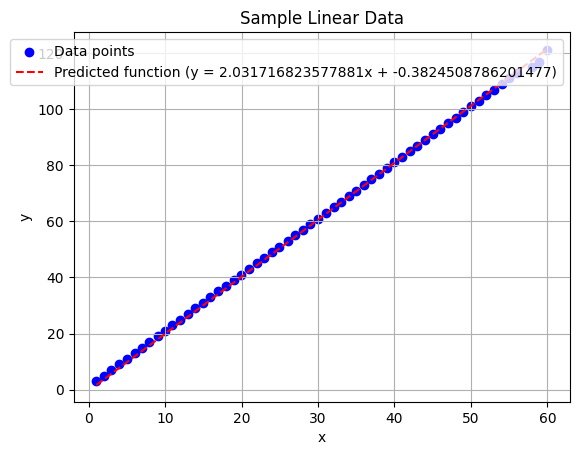

In [ ]:
# Learned parameters
[w, b] = model.parameters()
print(f"Learned weight: {w.item():.4f}, Learned bias: {b.item():.4f}")

# Make predictions on new data
x_test = torch.tensor([[5.0], [6.0]])
y_pred_test = model(x_test)
print("Predictions for x = 5.0 and 6.0:", y_pred_test.detach().numpy())

# Plot predictions and real data
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.weight.item()*x + model.bias.item(), color='red', linestyle='--', label=f'Predicted function (y = {w.item()}x + {b.item()})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Linear Data')
plt.legend()
plt.grid(True)
plt.show()